# Advanced Chemical Bonding with R in CoCalc - Chapter 2

## Electronegativity and Bond Polarity

This notebook contains Chapter 2 from the main Advanced Chemical Bonding with R in CoCalc notebook.

For the complete course, please refer to the main notebook: `Advanced Chemical Bonding with R in CoCalc.ipynb`


In [0]:
# Setup: Load essential R packages for chemical analysis

# Avoid interactive CRAN prompts
options(repos = c(CRAN = "https://cloud.r-project.org"))

required_packages <- c("ggplot2", "dplyr", "plotly", "corrplot", "reshape2", "RColorBrewer")

# Install missing packages quietly
missing <- required_packages[!vapply(required_packages, requireNamespace, logical(1), quietly = TRUE)]
if (length(missing)) install.packages(missing, quiet = TRUE)

# Attach packages without printing list results or masking chatter
suppressPackageStartupMessages({
  for (pkg in required_packages) {
    suppressWarnings(library(pkg, character.only = TRUE, quietly = TRUE, warn.conflicts = FALSE))
  }
})
# Alternatively:
# invisible(lapply(required_packages, function(pkg)
#   suppressWarnings(library(pkg, character.only = TRUE, quietly = TRUE, warn.conflicts = FALSE))
# ))

# Theme fix: use linewidth instead of size to avoid ggplot2 deprecation warning
chemistry_theme <- ggplot2::theme_minimal() +
  ggplot2::theme(
    plot.title = ggplot2::element_text(size = 16, face = "bold", color = "#2E86AB"),
    plot.subtitle = ggplot2::element_text(size = 12, color = "#A23B72"),
    axis.title = ggplot2::element_text(size = 12, face = "bold"),
    axis.text = ggplot2::element_text(size = 10),
    legend.title = ggplot2::element_text(size = 11, face = "bold"),
    panel.grid.minor = ggplot2::element_blank(),
    panel.border = ggplot2::element_rect(color = "gray80", fill = NA, linewidth = 0.5)
  )

cat("Chemical Analysis Toolkit Loaded Successfully!\n")
cat("Ready to explore the molecular world with R\n")

# Chapter 2: Electronegativity and Bond Polarity

## 2.1 Pauling Electronegativity Scale

Linus Pauling's electronegativity scale (1932) quantifies an atom's ability to attract electrons in a chemical bond. The scale runs from 0.7 (Francium) to 4.0 (Fluorine).

## 2.2 Bond Classification by Electronegativity Difference (ΔEN)

| ΔEN Range | Bond Type | Electron Distribution | Examples |
|-----------|-----------|----------------------|----------|
| 0.0 - 0.4 | Nonpolar Covalent | Equal sharing | H₂, Cl₂, CH₄ |
| 0.4 - 1.7 | Polar Covalent | Unequal sharing | H₂O, NH₃, HCl |
| > 1.7 | Ionic | Electron transfer | NaCl, MgO, CaF₂ |

## 2.3 Molecular Dipole Moments

The dipole moment (μ) quantifies molecular polarity:
**μ = δ × d**

Where δ = partial charge, d = distance between charges

`geom_smooth()` using formula = 'y ~ x'



📊 Detailed Bond Analysis:


 Molecule  Bond ΔEN              Type μ (D)
       H2   H-H 0.0 Nonpolar Covalent  0.00
       HF   H-F 1.9             Ionic  1.91
      H2O   O-H 1.4    Polar Covalent  1.85
      NH3   N-H 0.9    Polar Covalent  1.47
      CH4   C-H 0.4 Nonpolar Covalent  0.00
      CO2   C=O 1.0    Polar Covalent  0.00
     NaCl Na-Cl 2.1             Ionic  9.00
      MgO  Mg-O 2.3             Ionic  6.20
      HCl  H-Cl 0.9    Polar Covalent  1.08
       CO   C≡O 1.0    Polar Covalent  0.11


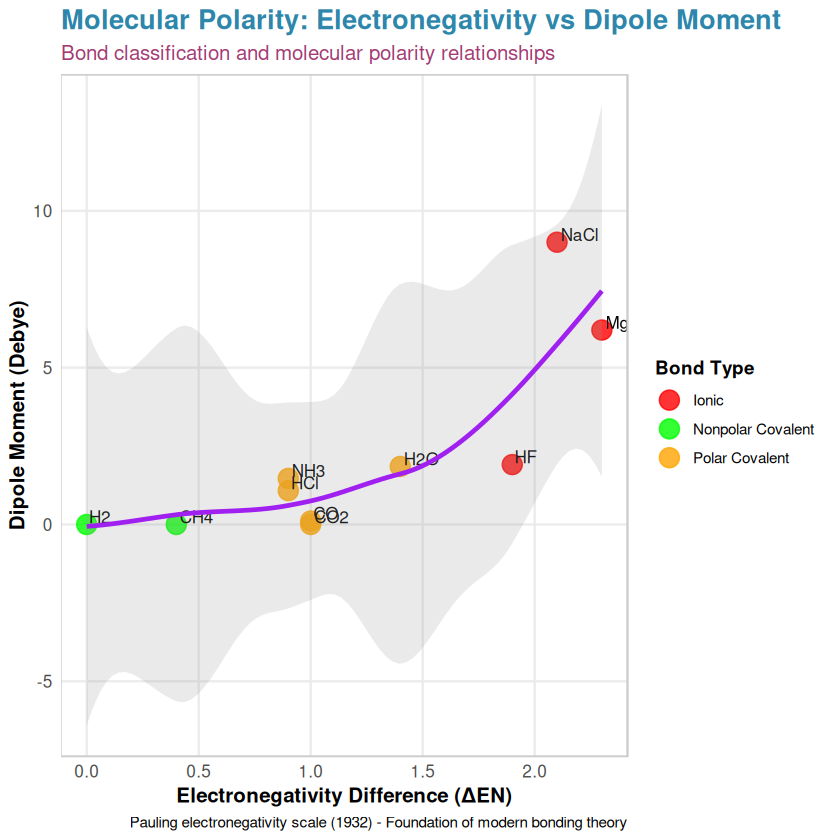

In [6]:
# Comprehensive electronegativity database (Pauling scale)
electronegativity_data <- data.frame(
  element = c("H", "Li", "Be", "B", "C", "N", "O", "F", 
              "Na", "Mg", "Al", "Si", "P", "S", "Cl", 
              "K", "Ca", "Br", "I"),
  electronegativity = c(2.1, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0,
                        0.9, 1.2, 1.5, 1.8, 2.1, 2.5, 3.0,
                        0.8, 1.0, 2.8, 2.5),
  period = c(1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5),
  group = c(1, 1, 2, 13, 14, 15, 16, 17, 1, 2, 13, 14, 15, 16, 17, 1, 2, 17, 17),
  atomic_radius = c(37, 152, 112, 85, 77, 75, 73, 72, 186, 160, 143, 118, 110, 103, 100, 227, 197, 114, 133)
)

# Function to classify bond type based on electronegativity difference
classify_bond <- function(en1, en2) {
  delta_en <- abs(en1 - en2)
  if (delta_en <= 0.4) {
    return(list(type = "Nonpolar Covalent", delta = delta_en, color = "green"))
  } else if (delta_en <= 1.7) {
    return(list(type = "Polar Covalent", delta = delta_en, color = "orange"))
  } else {
    return(list(type = "Ionic", delta = delta_en, color = "red"))
  }
}

# Analyze common molecular bonds
common_bonds <- data.frame(
  molecule = c("H2", "HF", "H2O", "NH3", "CH4", "CO2", "NaCl", "MgO", "HCl", "CO"),
  bond = c("H-H", "H-F", "O-H", "N-H", "C-H", "C=O", "Na-Cl", "Mg-O", "H-Cl", "C≡O"),
  element1 = c("H", "H", "O", "N", "C", "C", "Na", "Mg", "H", "C"),
  element2 = c("H", "F", "H", "H", "H", "O", "Cl", "O", "Cl", "O"),
  dipole_moment = c(0.0, 1.91, 1.85, 1.47, 0.0, 0.0, 9.0, 6.2, 1.08, 0.11) # Debye units
)

# Calculate electronegativity differences and classify bonds
for (i in 1:nrow(common_bonds)) {
  en1 <- electronegativity_data$electronegativity[electronegativity_data$element == common_bonds$element1[i]]
  en2 <- electronegativity_data$electronegativity[electronegativity_data$element == common_bonds$element2[i]]
  
  if (length(en1) > 0 && length(en2) > 0) {
    bond_info <- classify_bond(en1, en2)
    common_bonds$delta_en[i] <- bond_info$delta
    common_bonds$bond_type[i] <- bond_info$type
    common_bonds$type_color[i] <- bond_info$color
  }
}

# Create comprehensive bond polarity visualization
p_polarity <- ggplot(common_bonds, aes(x = delta_en, y = dipole_moment)) +
  geom_point(aes(color = bond_type), size = 5, alpha = 0.8) +
  geom_text(aes(label = molecule), hjust = -0.1, vjust = -0.1, size = 3.5) +
  geom_smooth(method = "loess", se = TRUE, alpha = 0.2, color = "purple") +
  scale_color_manual(values = c("Ionic" = "red", "Polar Covalent" = "orange", "Nonpolar Covalent" = "green")) +
  labs(
    title = "Molecular Polarity: Electronegativity vs Dipole Moment",
    subtitle = "Bond classification and molecular polarity relationships",
    x = "Electronegativity Difference (ΔEN)",
    y = "Dipole Moment (Debye)",
    color = "Bond Type",
    caption = "Pauling electronegativity scale (1932) - Foundation of modern bonding theory"
  ) +
  chemistry_theme +
  theme(legend.position = "right")

print(p_polarity)

# Display detailed bond analysis table
cat("\n Detailed Bond Analysis:\n")
cat("============================\n")
bond_summary <- common_bonds[, c("molecule", "bond", "delta_en", "bond_type", "dipole_moment")]
names(bond_summary) <- c("Molecule", "Bond", "ΔEN", "Type", "μ (D)")
print(bond_summary, row.names = FALSE)

---

## **From Electronegativity and Bond Polarity to Bond Energy and Molecular Stability**

We've explored **electronegativity and bond polarity**, understanding how these fundamental concepts shape our understanding of molecular interactions and chemical behavior.

**But how do these principles extend to bond energy and molecular stability?**

In Chapter 3, we'll discover how the concepts we've just learned provide the foundation for understanding even more complex chemical phenomena. You'll see how the principles of bonding and molecular structure directly influence the properties and behaviors we observe in real-world applications.

### **Journey Forward**

The transition from chapter 2 to chapter 3 represents a natural progression in chemical understanding. The foundational knowledge you've gained here will illuminate the advanced concepts ahead.

**[Continue to Chapter 3: Bond Energy and Molecular Stability →](https://cocalc.com/share/public_paths/52d578a1c5a83bad53a4bea266c0d4ca19f385e7)**

*or*

**[Return to Main Notebook](https://cocalc.com/share/public_paths/7dd5489d3b71bd4cdad4b0074ebe4d5e839426d2)**